<a href="https://colab.research.google.com/github/Drgross93/CSCI-191/blob/main/Copy_of_Copy_of_MNIST_DearGodLetThisWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Daniel Gross 11/28/21
#Built for kaggle competition, featuring code supplied by David Ruby


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

This is just the includes.

In [ ]:
mnist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_train.csv')
data = mnist.values

In [ ]:
rnd_pca = PCA(n_components=36)
rnd_pca.fit(data[:,1:])
X_reduced = rnd_pca.transform(data[:,1:])


(42000, 36)


In [ ]:
clf1 = LogisticRegression(solver='saga', max_iter=10000)
clf1.fit(X_reduced, data[:, 0] )

In [ ]:
predict = clf1.predict(X_reduced)
print("Accuracy = ", accuracy_score(predict, data[:, 0]))

Accuracy =  0.8929761904761905


Using Logistic regression, This model produceda submission that scored just shy of 90%.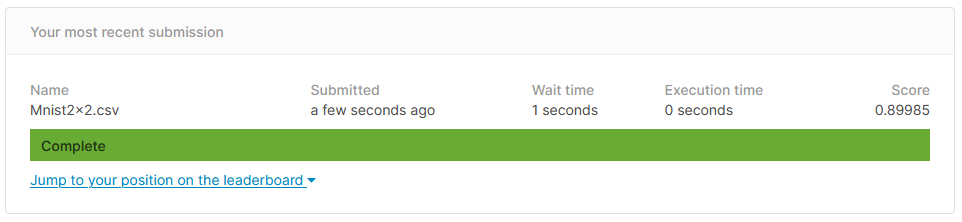

In [ ]:
mnistTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_test.csv')
test = mnistTest.values
XTest_reduced = rnd_pca.transform(test)
predict = clf1.predict(XTest_reduced)

(28000, 36)


In [ ]:
mnistTest.info()
mnistTest.index.name='ImageId'
mnistTest['label']=predict
mnistTest.index+=1
mnistTest['label'].to_csv('Mnist2x2.csv', index=True, header=True)

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=(10), random_state=1, max_iter=10000)
clf1 = LogisticRegression(max_iter=10000)
clf1.fit(X_reduced, data[:, 0] )




LogisticRegression(max_iter=10000)

In [ ]:
predict = clf1.predict(X_reduced)
print("Accuracy = ", accuracy_score(predict, data[:, 0]))

Accuracy =  0.9013809523809524


In [ ]:
mnistTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNIST_test.csv')
test = mnistTest.values
XTest_reduced = rnd_pca.transform(test)
predict = clf1.predict(XTest_reduced)

In [ ]:
mnistTest.info()
mnistTest.index.name='ImageId'
mnistTest['label']=predict
mnistTest.index+=1
mnistTest['label'].to_csv('Mnist2x2_MLP.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


Using MLP classifier,this model produced a submission that scored 89.775%, again just short of 90%. 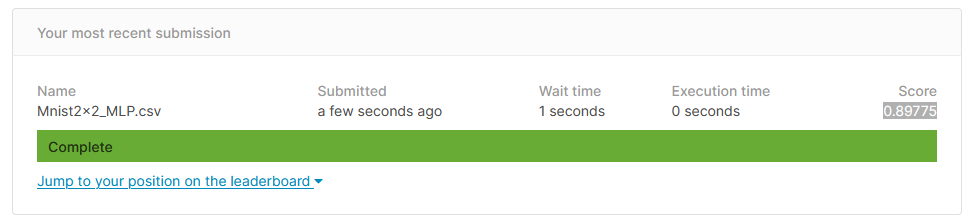